# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [8]:
import openpyxl

wb = openpyxl.load_workbook('себестоимостьА_в1.xlsx')

# лист "Рецепт"
ws = wb['Рецептура']

#информация о цене ресурсов и среднем физическом расходе
price = ws['G14':'O14']
consumption = ws['G15':'O15']

# рассчет себестоимость производства для каждого продукта
cost = []
for i in range(len(price[0])):
    cost.append(price[0][i].value * consumption[0][i].value)

#вес каждого продукта.
weight = [ws['D' + str(j)].value for j in range(7, 11)]

#себестоимость продукции за единицу веса
unit_cost = [c / w for c, w in zip(cost, weight)]

for i, c in enumerate(unit_cost):
    print(f'Себестоимость {ws["C" + str(7 + i)].value} = {c:.2f}')


Себестоимость Хлеб Венгерский = 2.35
Себестоимость Хлеб "Барбари" = 11.28
Себестоимость Багет парижский = 8.46
Себестоимость Чиабатта = 1.37


2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [18]:
# результаты в отдельной колонке раздела "Пшеничный хлеб".
for i, c in enumerate(unit_cost):
    ws['P' + str(7 + i)] = c
    
wb.save('себестоимостьА_в1.xlsx')
for i in range(4):
    print(ws['P' + str(7 + i)].value)



2.345
11.28
8.464
1.368


3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [19]:
from openpyxl.styles import Alignment

# Получаем столбец P
column_p = ws['P']

# Применяем форматирование
for cell in column_p:
    cell.alignment = Alignment(horizontal='center', vertical='center')

wb.save('себестоимостьА_в1.xlsx')

4. Выполнить 3 с помощью "протягиваемых" формул.

In [22]:
for cell in ws['P7:P10']:
    for c in cell:
        c.number_format = '0.00'

wb.save('себестоимостьА_в1.xlsx')

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [12]:
import pandas as pd

# загрузка данных из файла 
reviews_df = pd.read_csv("reviews_sample.csv", index_col=0)

# загрузка данных из файла 
recipes_df = pd.read_csv("recipes_sample.csv", index_col=0)
# удаление столбцов
recipes_df = recipes_df.drop(columns=['contributor_id', 'n_steps'])

# первые несколько строк данных о рецептах
print(recipes_df.head())

                                             id  minutes   submitted  \
name                                                                   
george s at the cove  black bean soup     44123       90  2002-10-25   
healthy for them  yogurt popsicles        67664       10  2003-07-26   
i can t believe it s spinach              38798       30  2002-08-29   
italian  gut busters                      35173       45  2002-07-27   
love is in the air  beef fondue   sauces  84797       25  2004-02-23   

                                                                                description  \
name                                                                                          
george s at the cove  black bean soup     an original recipe created by chef scott meska...   
healthy for them  yogurt popsicles        my children and their friends ask for my homem...   
i can t believe it s spinach                        these were so go, it surprised even me.   
italian  gut busters

2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [86]:
reviews_df = pd.read_csv('reviews_sample.csv')

#5% случайных строк из каждой таблицы
reviews_sample = reviews_df.sample(frac=0.05)
recipes_sample = recipes_df.sample(frac=0.05)

#cоздали Excel файл
with pd.ExcelWriter('recipes.xlsx') as writer:
    reviews_sample.to_excel(writer, sheet_name='Отзывы')
    recipes_sample.to_excel(writer, sheet_name='Рецепты')

print("Отзывы:")
print(reviews_sample.head())
print("Рецепты:")
print(recipes_sample.head())

Отзывы:
       Unnamed: 0     user_id  recipe_id        date  rating  \
18078      688791      422893     181857  2008-02-12       4   
97504      217760     2246289      21688  2017-04-21       2   
42610      579823      133174     179397  2006-08-27       5   
80574      933453      183386     272253  2009-12-08       5   
59221      467927  2001482226     119152  2018-08-20       5   

                                                  review  
18078  Nice combo, I also added a bit of red onion fo...  
97504  Too bland. Next time I will add some Italian s...  
42610  The intro says it all:  "A yummy and different...  
80574  Very well received by my family.  I will defin...  
59221  Followed recipe amounts exactly. Made my coffe...  
Рецепты:
                                     name      id  minutes  contributor_id  \
15575  lamb and cheese stuffed sandwiches  379182      130           37449   
1202              asian braised duck legs   85960      140           52282   
6524      

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [114]:

import xlwings as xw

wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']

# значения из столбца minutes
times = sht.range('D2:D100').value

# переводим из минут в секунды
seconds_assign=[time * 60 for time in times]

# присваиваем значения столбцу "seconds_assign"
for i, seconds in enumerate(seconds_assign):
    sht.range(f'BD{2+i}').value = seconds
# название столбца в ячейку BD1
sht.range('BD1').value = 'seconds_assign'

# вывод информации о рецептах
for i in range(5):
    name = sht.range('B2').offset(i, 0).value
    seconds = seconds_assign[i] 
    print(f"Name: {name},seconds: {seconds}")

wb.save()

Name: lamb and cheese stuffed sandwiches,seconds: 7800.0
Name: asian braised duck legs,seconds: 8400.0
Name: chocolate chip ice cream,seconds: 1800.0
Name: mexican soupa,seconds: 1800.0
Name: jeff probst s oscar s delight,seconds: 1560.0


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [164]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']
# запись в ячейку BF1 значения 'seconds_formula'
sht.range('BF1').value = 'seconds_formula'
# запись в ячейку BF2 формулы '=D2*60'
sht.range('BF2').formula = '=D2*60'


seconds_assign = []
for i in range(5):
    name = sht.range('B2').offset(i, 0).value
    minutes = sht.range('D2').offset(i, 0).value
    # преобразование минут в секунды
    seconds = minutes * 60
    seconds_assign.append(seconds)
    print(f"Name: {name}, seconds: {seconds}")
    
wb.save()

Name: lamb and cheese stuffed sandwiches, seconds: 7800.0
Name: asian braised duck legs, seconds: 8400.0
Name: chocolate chip ice cream, seconds: 1800.0
Name: mexican soupa, seconds: 1800.0
Name: jeff probst s oscar s delight, seconds: 1560.0


5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [158]:

import openpyxl

workbook = openpyxl.load_workbook('recipes.xlsx')
worksheet = workbook['Рецепты']

# названия столбцов жирным шрифтом и выровнение по центру
worksheet.cell(row=1, column=58, value="seconds_formula").font = openpyxl.styles.Font(bold=True)
worksheet.cell(row=1, column=58).alignment = openpyxl.styles.Alignment(horizontal='center')

worksheet.cell(row=1, column=56, value="seconds_assign").font = openpyxl.styles.Font(bold=True)
worksheet.cell(row=1, column=56).alignment = openpyxl.styles.Alignment(horizontal='center')

workbook.save('recipes.xlsx')



6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [161]:
import openpyxl

wb = openpyxl.load_workbook('recipes.xlsx')

sheet = wb['Рецепты']

#  по ячейкам в столбце "минуты"
for cell in sheet['D']: 
    if cell.value is not None and isinstance(cell.value, (int, float)):
        if int(cell.value) < 5:
            cell.fill = openpyxl.styles.PatternFill(start_color='00FF00', end_color='00FF00', fill_type='solid')  # зел
        elif int(cell.value) <= 10:
            cell.fill = openpyxl.styles.PatternFill(start_color='FFFF00', end_color='FFFF00', fill_type='solid')  # желт
        else:
            cell.fill = openpyxl.styles.PatternFill(start_color='FF0000', end_color='FF0000', fill_type='solid')  # красн

# сохр
wb.save('recipes.xlsx')





7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [1]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sht = wb.sheets['Рецепты']

sht.range('BG1').value = 'n_reviews'
sht.range('BG2').formula = '=D2*60'


## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [119]:
def validate():
    wb = openpyxl.load_workbook('recipes.xlsx')
    reviews = wb['Отзывы']
    recipes = wb['Рецепты']
    
    for row in reviews.iter_rows(min_row=2, max_row=reviews.max_row, min_col=1, max_col=3):
        # получаем рейтинг и рецепт из текущей строки
        rating = row[2].value
        recipe = row[3].value
        # если рейтинг не в диапазоне от 0 до 5, закрашиваем ячейку с рейтингом
        if not (rating >= 0 and rating <= 5):
            reviews.cell(row=row[0].row, column=3).fill = PatternFill(start_color=start_color, end_color=end_color, fill_type="solid")
        # если рецепт не существует в листе "Рецепты", закрашиваем ячейку с рецептом
        if recipe not in [r[1].value for r in recipes.iter_rows(min_row=2, max_row=recipes.max_row, min_col=1, max_col=2)]:
            reviews.cell(row=row[0].row, column=4).fill = PatternFill(start_color=start_color, end_color=end_color, fill_type="solid")
    
    wb.save('recipes.xlsx')


9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [ ]:
import csv
import xlwings as xw
# открываем CSV
with open('recipes_model.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

with xw.App() as app:
    wb = xw.Book('recipes_model.xlsx')
    sht = wb.sheets['Модель']
    # записываем данные в диапазон A2
    sht.range('A2').value = data
    wb.save()
    
 

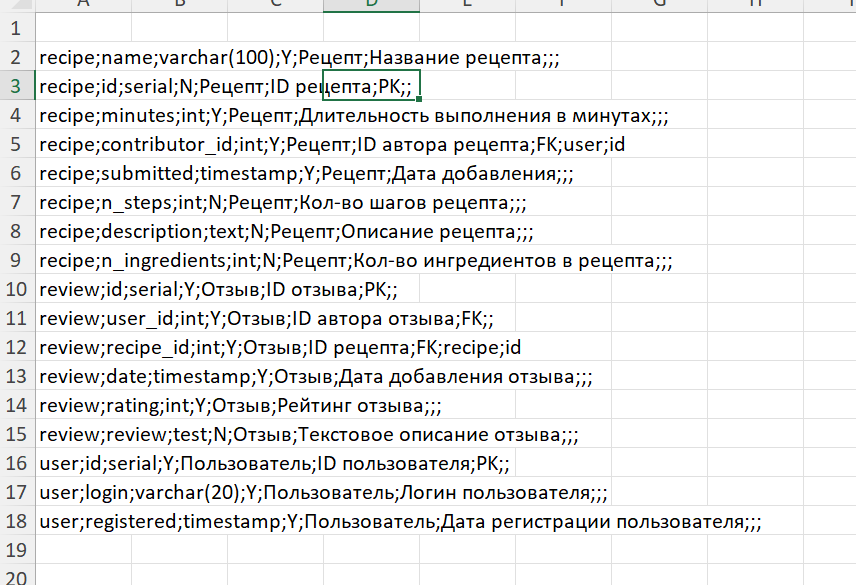

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [54]:

import xlwings as xw


wb = xw.Book('recipes_model.xlsx')
sht = wb.sheets['Модель']

# формируем формулу для столбца 'J'
formula = '=B2 & " " & UPPER(C2) & " " & IF(G2="PK","PRIMARY KEY",IF(G2="FK","REFERENCES " & H2 & "(" & I2 & ")",IF(D2="Y" & A2<>"PK","NOT NULL","")))'

# находим последнюю строку с данными в столбце 'B'
last_row = sht.range('B' + str(sht.cells.last_cell.row)).end('up').row
# записываем формулу в диапазон ячеек 
sht.range('J1:J' + str(last_row)).formula = formula


wb.save()


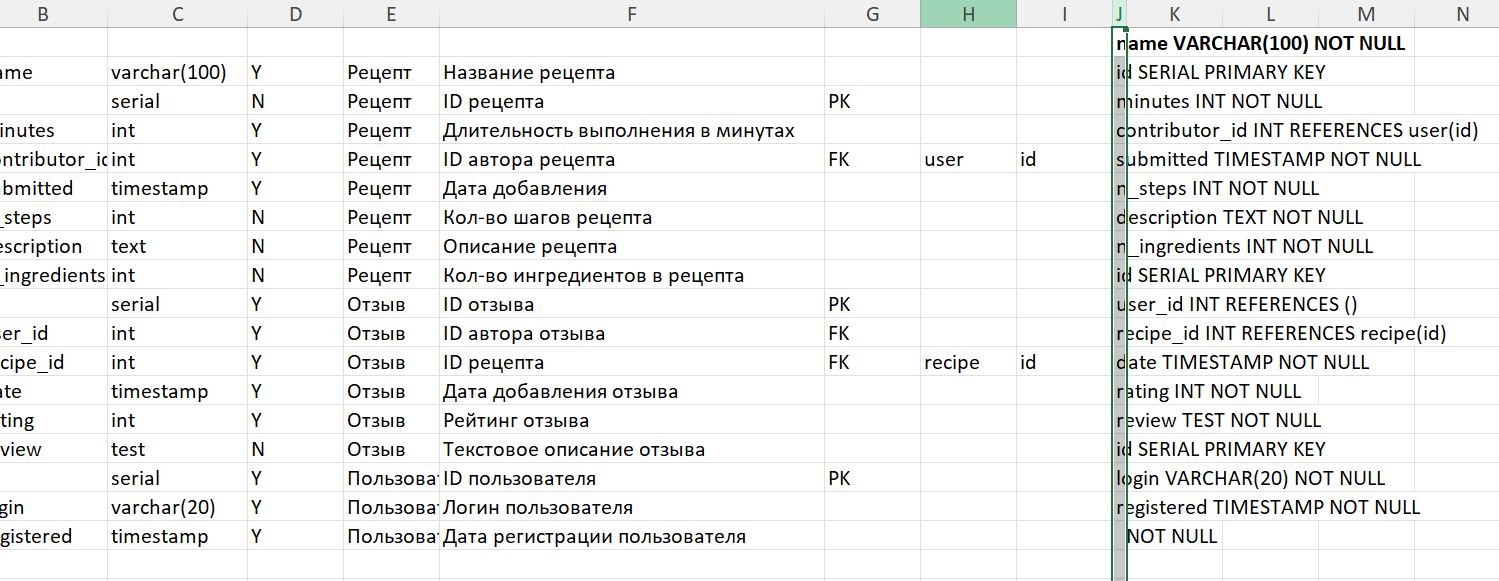

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [58]:
import xlwings as xw


wb = xw.Book('recipes_model.xlsx')
sht = wb.sheets['Модель']

# задаём цвет фона для диапазона ячеек 'A2:F2'
sht.range('A2:F2').api.Interior.Color = 0x00ccff
# растягиваем ширину столбцов 
sht.range('A1:F1').api.EntireColumn.AutoFit()
# задаём жирный шрифт
sht.range('A1:F1').api.Font.Bold = True
# отключаем автофильтр для текущего листа
sht.api.AutoFilterMode = False
# включаем автофильтр для столбца 'A' с критерием '>0'
sht.api.Range('A1:F1').AutoFilter(Field := 1, Criteria1 := '>0')


wb.save()

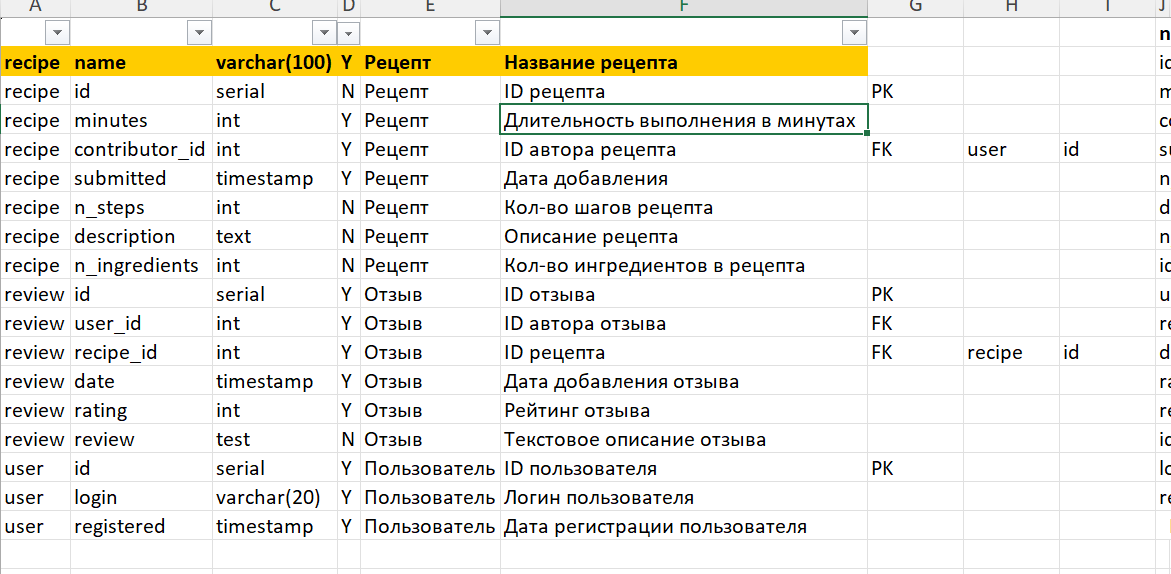

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

wb = xw.Book('recipes_model.xlsx')
data = wb.sheets['Модель'].range('A:B').options(pd.DataFrame, header=1, index=False).value
# переименовываем столбцы  в 'Entity' и 'Attribute'
data.columns = ['Entity', 'Attribute']
# группируем данные по столбцу 'Entity' и подсчитываем количество уникальных значений в столбце 'Attribute'
grouped_data = data.groupby('Entity')['Attribute'].count()
# записываем данные в 'A1' лист 'Статистика' 
stat_sht = wb.sheets['Статистика']
stat_sht.range('A1').value = grouped_data
# данные в виде столбчатой диаграммы
ax = grouped_data.plot(xlabel='Entity', y='Attribute', ylabel='Кол-во атрибутов', kind='bar', legend=list(grouped_data.index.values))
fig = ax.get_figure()
stat_sht.pictures.add(fig, name='MyPlot', left=stat_sht.range('E2').left, top=stat_sht.range('E2').top, update=True)
wb.save()




  


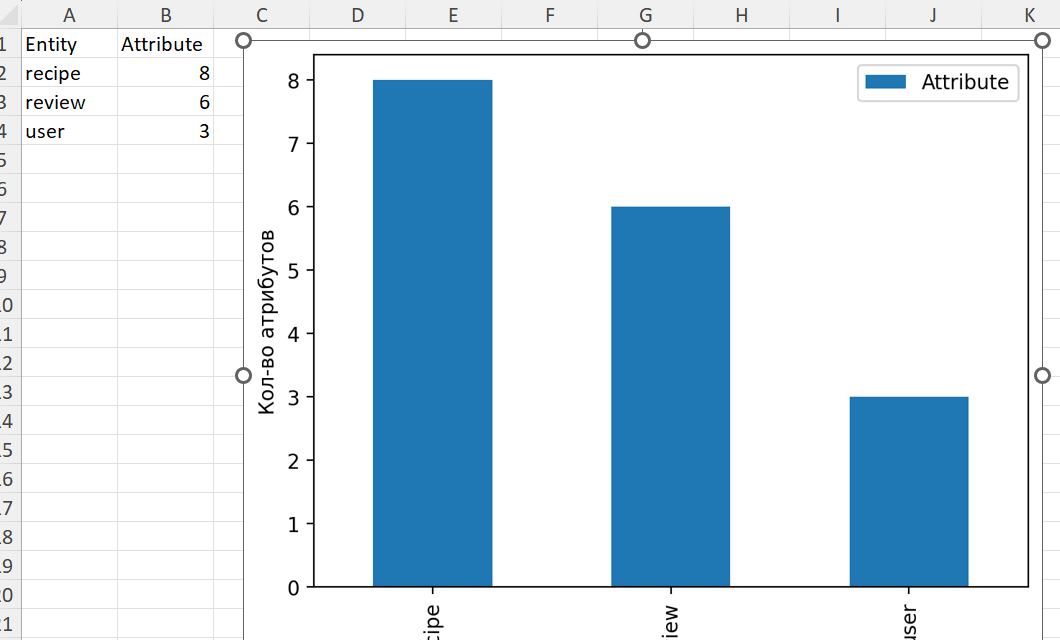